In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
cust = pd.read_csv('./Customer_info.csv')
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [3]:
cust.describe(include='all')

,고객ID,성별,고객지역,가입기간
count,1468,1468,1468,1468.000000
unique,1468,2,5,NaN
top,USER_1358,여,California,NaN
freq,1,934,464,NaN
mean,NaN,NaN,NaN,25.912125
std,NaN,NaN,NaN,13.959667
min,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,14.000000
50%,NaN,NaN,NaN,26.000000
75%,NaN,NaN,NaN,38.000000


In [4]:
discnt = pd.read_csv('./Discount_info.csv')
discnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
discnt.describe(include='all')

,월,제품카테고리,쿠폰코드,할인율
count,204,204,204,204.000000
unique,12,17,48,NaN
top,Jan,Apparel,EXTRA10,NaN
freq,17,12,8,NaN
mean,NaN,NaN,NaN,20.000000
std,NaN,NaN,NaN,8.185052
min,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,10.000000
50%,NaN,NaN,NaN,20.000000
75%,NaN,NaN,NaN,30.000000


In [6]:
mkting = pd.read_csv('./Marketing_info.csv')
mkting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [7]:
mkting.describe(include='all')

,날짜,오프라인비용,온라인비용
count,365,365.000000,365.000000
unique,365,NaN,NaN
top,2019-01-01,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2843.561644,1905.880740
std,NaN,952.292448,808.856853
min,NaN,500.000000,320.250000
25%,NaN,2500.000000,1258.600000
50%,NaN,3000.000000,1881.940000
75%,NaN,3500.000000,2435.120000


In [8]:
sales = pd.read_csv('./Onlinesales_info.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [9]:
sales.describe(include='all')

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
count,52924,52924,52924,52924,52924,52924.000000,52924.000000,52924.000000,52924
unique,1468,25061,365,1145,20,NaN,NaN,NaN,3
top,USER_0118,Transaction_12261,2019-11-27,Product_0981,Apparel,NaN,NaN,NaN,Clicked
freq,695,35,335,3511,18126,NaN,NaN,NaN,26926
mean,NaN,NaN,NaN,NaN,NaN,4.497638,52.237646,10.517630,NaN
std,NaN,NaN,NaN,NaN,NaN,20.104711,64.006882,19.475613,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.390000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,5.700000,6.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,16.990000,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,102.130000,6.500000,NaN


In [10]:
# 한 거래마다 한 명의 고객이 아님...!
# 거래 하나에 최대 8명
sales.groupby('거래ID').agg({'고객ID':'nunique'}).sort_values('고객ID',ascending=False).head(5)
# 고객ID와 거래ID를 같이 묶어서 groupby 해야하나...?

,고객ID
거래ID,
Transaction_6844,8
Transaction_13656,8
Transaction_16869,6
Transaction_9097,6
Transaction_4998,6


### 전처리: 새로운 거래ID 부여 (기존 거래ID -> old_거래ID)

In [11]:
made_tidx = sales.groupby(['고객ID', '거래ID'])['수량'].min().reset_index().reset_index()
made_tidx = made_tidx.assign(index=made_tidx['index'].astype('str').str.zfill(5))
made_tidx = made_tidx.assign(index=made_tidx['index'].apply(lambda x: 'Transaction_' + x))
made_tidx = made_tidx.rename(columns={'index':'new_거래ID'})
sales = sales.merge(made_tidx[['new_거래ID', '고객ID', '거래ID']], on=['고객ID', '거래ID'], how='left')
sales = sales.rename(columns={'거래ID':'old_거래ID', 'new_거래ID':'거래ID'})

In [12]:
# 한 거래마다 한 명의 고객
sales.groupby('거래ID').agg({'고객ID':'nunique'}).sort_values('고객ID',ascending=False).head(5)

,고객ID
거래ID,
Transaction_00000,1
Transaction_16645,1
Transaction_17761,1
Transaction_17760,1
Transaction_17759,1


In [13]:
tax = pd.read_csv('./Tax_info.csv')
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [14]:
tax.describe(include='all')

,제품카테고리,GST
count,20,20.000000
unique,20,NaN
top,Nest-USA,NaN
freq,1,NaN
mean,NaN,0.116500
std,NaN,0.052443
min,NaN,0.050000
25%,NaN,0.087500
50%,NaN,0.100000
75%,NaN,0.180000


In [15]:
### 전처리: 시계열 컬럼
discnt = discnt.assign(월=pd.to_datetime(discnt['월'], format='%b').dt.month)
mkting = mkting.assign(날짜=pd.to_datetime(mkting['날짜'], format='%Y-%m-%d'))
sales = sales.assign(거래날짜=pd.to_datetime(sales['거래날짜'], format='%Y-%m-%d'))

## merge (join)
- sales <-> cust: 고객ID
- sales <-> tax: 제품카테고리
- sales <-> mkting: 거래날짜 + 날짜
- sales <-> discnt: (거래날짜, 제품카테고리) + (월, 제품카테고리)

In [16]:
sales = sales.assign(월=sales['거래날짜'].dt.month)

In [17]:
sales = cust.merge(sales, how='right', on='고객ID')
sales = sales.merge(discnt, how='left', on=('월', '제품카테고리'))
sales = sales.merge(tax, how='left', on='제품카테고리')
sales = sales.merge(mkting, how='left', left_on='거래날짜', right_on='날짜')

In [18]:
# sales = sales.drop(columns='월')

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   고객ID      52924 non-null  object        
 1   성별        52924 non-null  object        
 2   고객지역      52924 non-null  object        
 3   가입기간      52924 non-null  int64         
 4   old_거래ID  52924 non-null  object        
 5   거래날짜      52924 non-null  datetime64[ns]
 6   제품ID      52924 non-null  object        
 7   제품카테고리    52924 non-null  object        
 8   수량        52924 non-null  int64         
 9   평균금액      52924 non-null  float64       
 10  배송료       52924 non-null  float64       
 11  쿠폰상태      52924 non-null  object        
 12  거래ID      52924 non-null  object        
 13  월         52924 non-null  int32         
 14  쿠폰코드      52524 non-null  object        
 15  할인율       52524 non-null  float64       
 16  GST       52924 non-null  float64       
 17  날짜        52

In [403]:
#sales = sales.assign(총주문금액=sales['수량']*sales['평균금액'] * (1 - sales['할인율'] * 0.01) * (1 + sales['GST']) + sales['배송료'])
## Used인 경우에만 할인율 계산
def total_payment(x):
    if x['쿠폰상태']=='Used':
        return x['수량']*x['평균금액'] * (1 - x['할인율'] * 0.01) * (1 + x['GST']) + x['배송료']
    else:
        return x['수량']*x['평균금액'] * (1 + x['GST']) + x['배송료']

In [404]:
sales = sales.assign(총주문금액=sales.apply(total_payment, axis=1))

In [405]:
sales.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
고객ID,52924,1468,USER_0118,695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
성별,52924,2,여,33007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
고객지역,52924,5,Chicago,18380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입기간,52924.0,NaN,NaN,NaN,26.127995,2.0,15.0,27.0,37.0,50.0,13.478285
old_거래ID,52924,25061,Transaction_12261,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
거래날짜,52924,NaN,NaN,NaN,2019-07-05 19:16:09.450532864,2019-01-01 00:00:00,2019-04-12 00:00:00,2019-07-13 00:00:00,2019-09-27 00:00:00,2019-12-31 00:00:00,NaN
제품ID,52924,1145,Product_0981,3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
제품카테고리,52924,20,Apparel,18126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
수량,52924.0,NaN,NaN,NaN,4.497638,1.0,1.0,1.0,2.0,900.0,20.104711
평균금액,52924.0,NaN,NaN,NaN,52.237646,0.39,5.7,16.99,102.13,355.74,64.006882


In [406]:
# object / int, float (datetime) 따라서 hist 그래프 만드는 함수 만들기
def get_3_hist(data:pd.DataFrame, columns:list=None):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    
    if columns==None:
        columns = data.columns.to_list()

    col_len = len(columns)
    if col_len < 3:
        col_len = 3
    
    plt.figure(figsize=(16, 5 * (col_len // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(col_len // 3 + (col_len % 3 > 0), 3, i + 1)

        if 'id' in col.lower():
            df = data[col].value_counts()[:10]
            col += ' Top 10'

            plt.bar(df.index, df)
            """            
            for x,y in df.items():
                plt.text(x,y,y)
            """
        elif data[col].dtype == 'object':
            df = data[col].value_counts()
            if len(df) > 10:
                df = pd.concat([df[:9], pd.Series({'extra':df[9:].sum()})])
            plt.pie(df, autopct='%.1f%%', labels=df.index)
            # plt.legend(df.index, loc='upper left')
        else:
            plt.hist(data[col])

        plt.title(col)
        plt.xticks(rotation=90)
    
    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

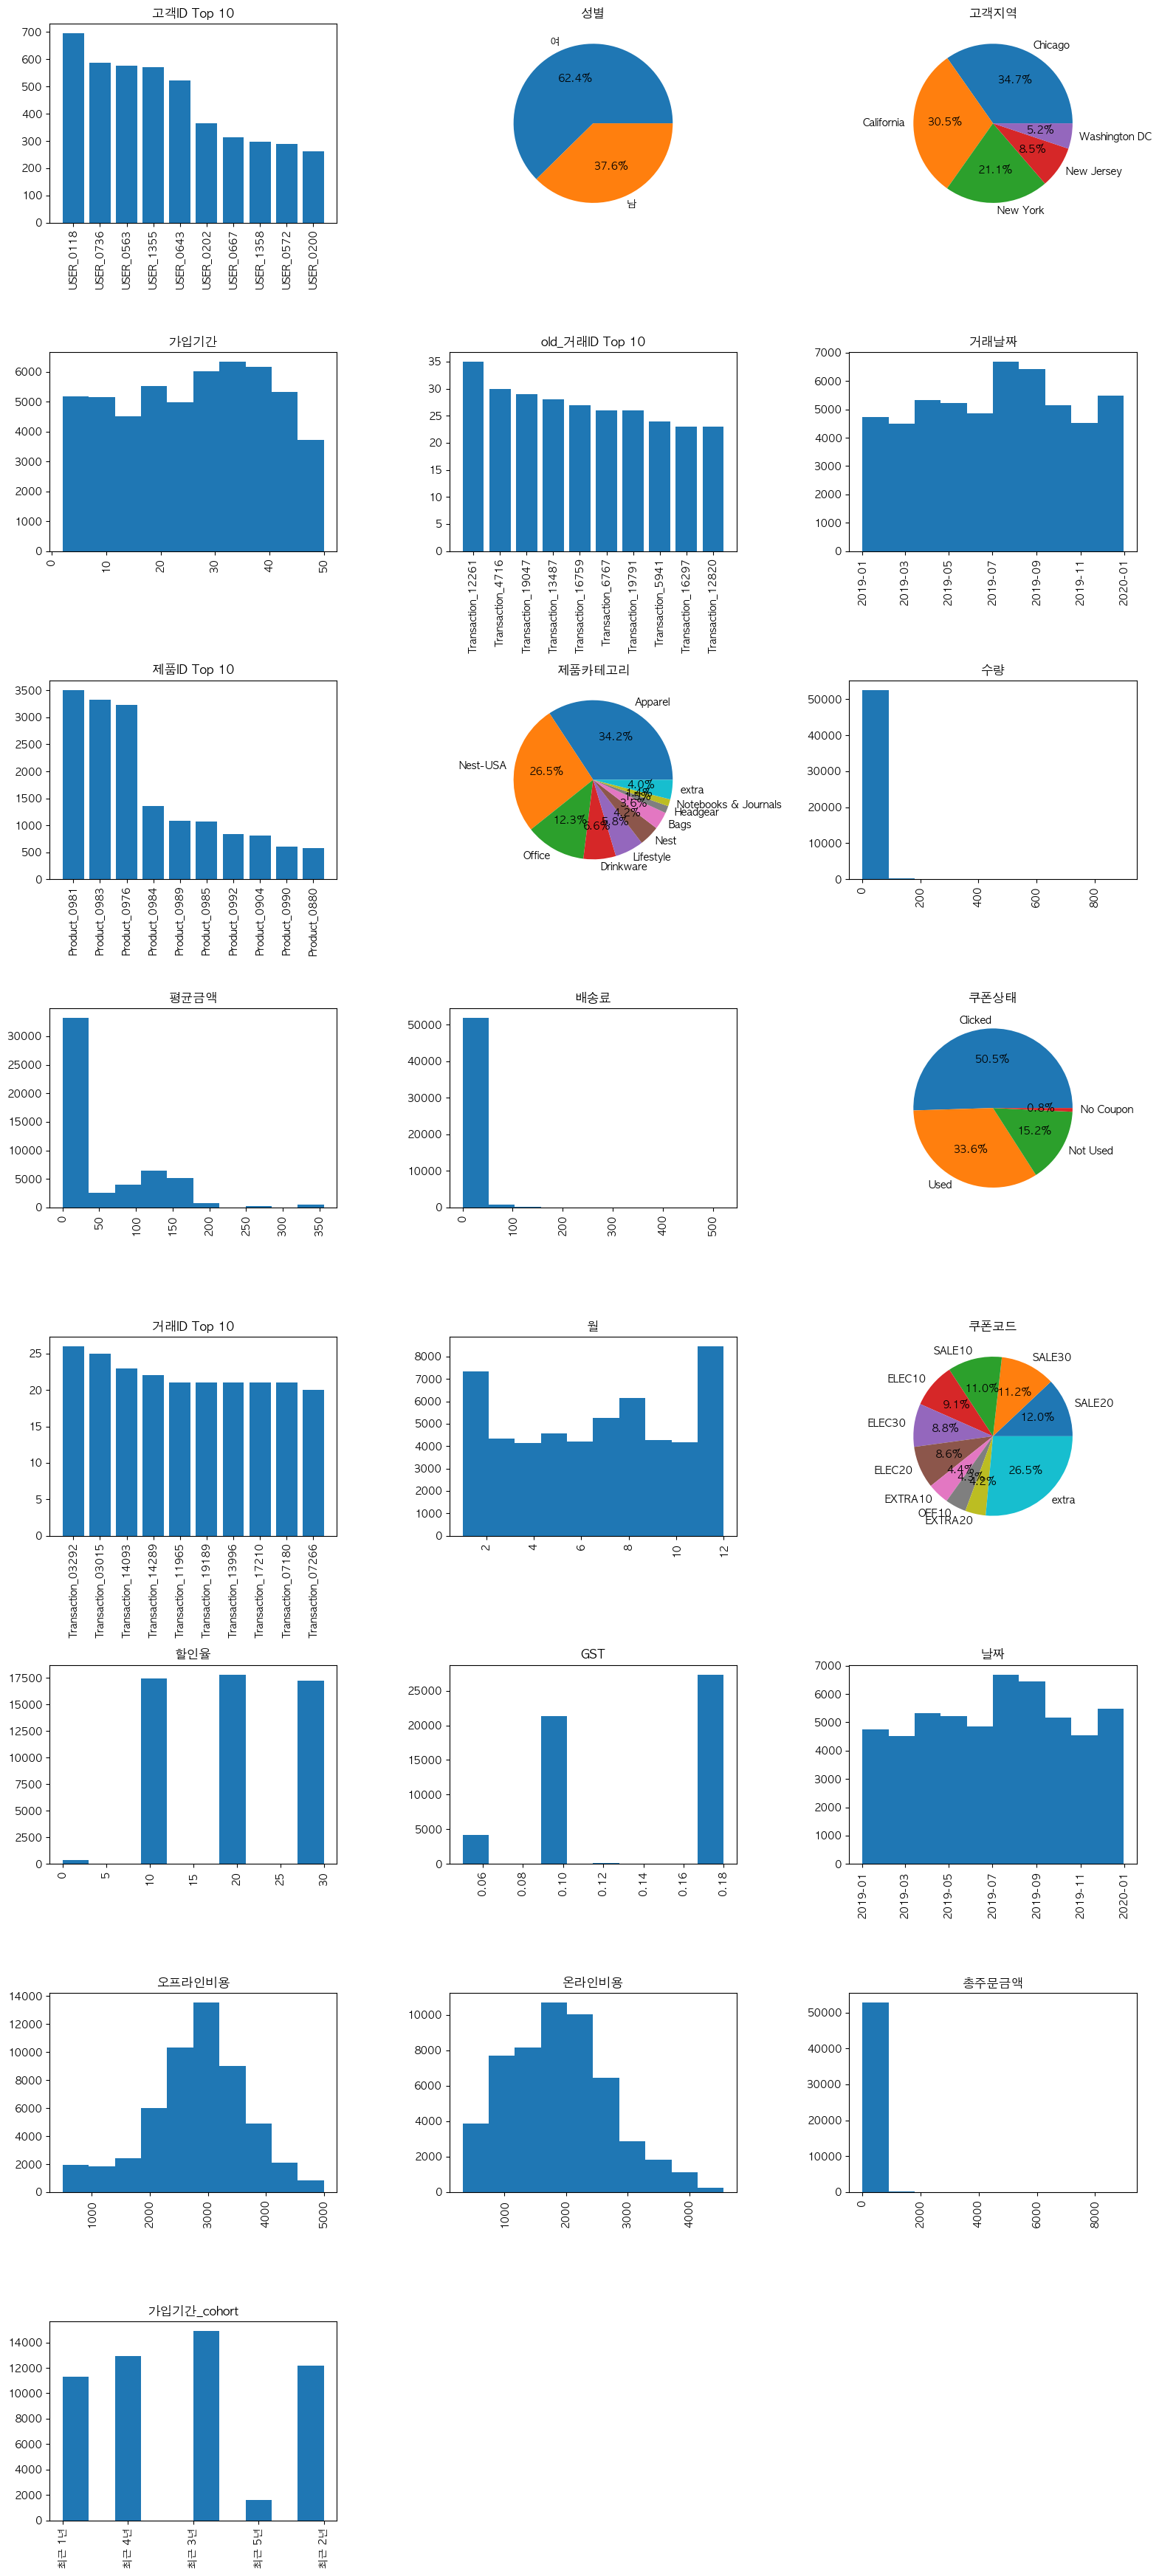

In [407]:
get_3_hist(sales)

- 주문의 62.4%가 여자 고객에게서 이루어짐
- 주문이 많은 지역순: **Chicago > CA** > NY > NJ > WDC
- 주로 가입한지 **30 ~ 40달**인 고객이 주문을 많이 함
- 거래날짜: 8,9월에 주문이 많음
- 주문이 많은 카테고리순: Apparel > Nest-USA > Office > **Drinkware**
- 주문의 **33.8%가 쿠폰을 Used**

**이상치: boxplot, IQR, z-score, DBscan -> 제거할 필요 없음, KEEP!!**

<<의문>>
- 쿠폰사용: Not Used에 Not Clicked도 포함되는 것일까..? 그렇지 않다면, 모두가 Clicked은 하고 -> Used/Not Used로 나뉘는 걸까...
- 월 vs 거래날짜: 왜 다른 분포…?

array([[<Axes: title={'center': '월'}>, <Axes: title={'center': '거래날짜'}>]],
      dtype=object)

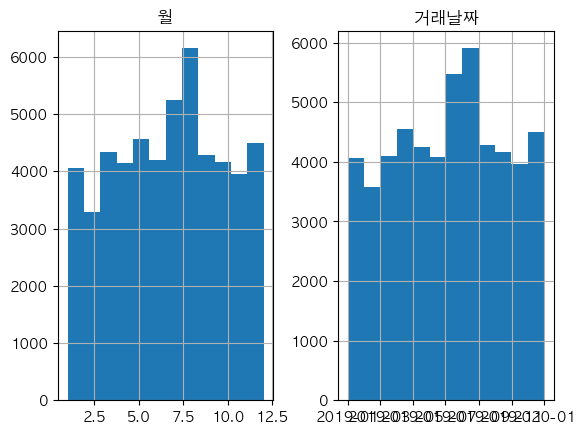

In [408]:
# '월' 컬럼이 int형으로 분포가 확인되어서 생긴 문제 -> bins를 12(개월)로 지정해주니, 동일한 분포를 보임
sales[['월', '거래날짜']].hist(bins=12)

In [409]:
sales.head(5)

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,...,Transaction_24406,1,ELEC10,10.0,0.10,2019-01-01,4500,2424.5,158.6729,최근 1년
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,...,Transaction_24407,1,ELEC10,10.0,0.10,2019-01-01,4500,2424.5,158.6729,최근 1년
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,...,Transaction_24408,1,OFF10,10.0,0.10,2019-01-01,4500,2424.5,8.5295,최근 1년
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,...,Transaction_24409,1,SALE10,10.0,0.18,2019-01-01,4500,2424.5,109.9270,최근 1년
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,...,Transaction_24409,1,AIO10,10.0,0.18,2019-01-01,4500,2424.5,24.0230,최근 1년


In [410]:
# 지역별 집계
sales.groupby('고객지역').agg({'성별':pd.Series.mode, 
                           '가입기간':['min','mean', 'max'], 
                           '거래ID':'nunique', 
                           '제품카테고리': pd.Series.mode, 
                           '월':pd.Series.mode, 
                           '수량':['min','mean', 'max'],
                           '평균금액':['min', 'mean', 'max', 'sum'],
                           '배송료':['min', 'mean', 'max', 'sum'],
                           '총주문금액':['min', 'mean', 'max', 'sum'],
                           '쿠폰상태':pd.Series.mode})\
                           .style.background_gradient(axis=0).format(precision=2)

In [411]:
# 성별 집계
sales.groupby('성별').agg({'고객지역': pd.Series.mode, 
                         '가입기간':['min','mean', 'max'], 
                         '거래ID':'nunique', 
                         '제품카테고리': pd.Series.mode, 
                         '월':pd.Series.mode, 
                         '수량':['min','mean', 'max'],
                         '평균금액':['min', 'mean', 'max', 'sum'],
                         '배송료':['min', 'mean', 'max', 'sum'],
                         '총주문금액':['min', 'mean', 'max', 'sum'],                       
                         '쿠폰상태':pd.Series.mode})\
                           .style.background_gradient(axis=0).format(precision=2)

In [412]:
sales[sales['제품카테고리']=='Backpacks']['쿠폰상태'].value_counts()

쿠폰상태
No Coupon    89
Name: count, dtype: int64

In [413]:
# 제품 카테고리별 집계
sales.groupby('제품카테고리').agg({'고객지역': pd.Series.mode, 
                             '성별': pd.Series.mode,
                             '가입기간':['min','mean', 'max'],
                             '거래ID':'nunique',
                             '월':pd.Series.mode,
                             '수량':['min','mean', 'max'],
                             '평균금액':['min', 'mean', 'max', 'sum'],
                             '배송료':['min', 'mean', 'max', 'sum'],
                             '총주문금액':['min', 'mean', 'max', 'sum'],
                             '쿠폰상태':pd.Series.mode})\
                           .style.background_gradient(axis=0).format(precision=2)

In [414]:
def value_top2_pct(x):
    if len(x)>2:
        from  itertools import islice
        tmp = x.value_counts(normalize=True).round(2).to_dict().items()
        return dict(islice(tmp,2))
    return x.value_counts(normalize=True).round(2).to_dict()

In [415]:
# 쿠폰 사용은 누가 더 많이, 어디에 많이 사용할까
sales.groupby('쿠폰상태').agg(
    {
        '고객지역': value_top2_pct, 
        '성별': value_top2_pct,
        '가입기간':['min', 'mean', 'max'],
        '거래ID':'nunique',
        '제품카테고리':value_top2_pct,
        '월':pd.Series.mode,
        '수량':['min', 'mean', 'max'],
        '평균금액':['min', 'mean', 'max', 'sum'],
        '총주문금액':['min', 'mean', 'max', 'sum'],
    }
).style.background_gradient(axis=0).format(precision=2)

- Chicago와 CA 지역 고객이 1,2순위로 많아서 그런지, 쿠폰상태별로도 1,2위를 차지함
- 성별, 제품카테고리 역시 전체 데이터에서의 비율과 유사한 분포
- 각 쿠폰상태별마다 전체 데이터에서의 비율과 유사한 분포를 보이고 있다.

In [416]:
## box 그래프 뽑기
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   고객ID         52924 non-null  object        
 1   성별           52924 non-null  object        
 2   고객지역         52924 non-null  object        
 3   가입기간         52924 non-null  int64         
 4   old_거래ID     52924 non-null  object        
 5   거래날짜         52924 non-null  datetime64[ns]
 6   제품ID         52924 non-null  object        
 7   제품카테고리       52924 non-null  object        
 8   수량           52924 non-null  int64         
 9   평균금액         52924 non-null  float64       
 10  배송료          52924 non-null  float64       
 11  쿠폰상태         52924 non-null  object        
 12  거래ID         52924 non-null  object        
 13  월            52924 non-null  int32         
 14  쿠폰코드         52924 non-null  object        
 15  할인율          52924 non-null  float64       
 16  GST 

In [417]:
sales.groupby('성별').agg(
    {'고객ID':'nunique'}
)

,고객ID
성별,
남,534
여,934


In [418]:
# 고객ID별로 집계를 내리게 되면
sales_by_custID = sales.groupby('고객ID').agg(
    {'거래날짜':max,
     '제품카테고리':pd.Series.mode,
     '수량':'mean',
     '평균금액':'mean',
     '배송료':'mean',
     '쿠폰상태':pd.Series.mode,
     '월':pd.Series.mode,
     '할인율':'mean',
     'GST':'mean',
     '총주문금액':'sum'
     }
)

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_43049/682586709.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sales_by_custID = sales.groupby('고객ID').agg(


In [419]:
sales_by_custID = sales_by_custID.rename(columns={'총주문금액':'총지불금액', '거래날짜':'최근거래날짜', '제품카테고리':'최빈제품카테고리', '쿠폰상태':'최빈쿠폰상태', '월':'최빈구매달',
                                '수량':'평균구매수량', '평균금액':'평균구매단가', '배송료':'평균배송료', '할인율':'평균할인율', 'GST':'평균GST'})

In [420]:
sales_by_custID.describe()

,최근거래날짜,평균구매수량,평균구매단가,평균배송료,평균할인율,평균GST,총지불금액
count,1468,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,2019-08-08 16:59:10.953678336,4.464013,52.247074,10.514889,19.930443,0.137579,3676.674895
min,2019-01-01 00:00:00,1.000000,1.000000,5.333333,8.000000,0.050000,6.990000
25%,2019-05-25 00:00:00,1.400000,32.193401,6.500000,11.487179,0.126667,783.974310
50%,2019-08-22 00:00:00,2.400000,48.186962,7.748125,20.000000,0.138571,2011.622610
75%,2019-11-06 00:00:00,4.940035,67.195208,10.432799,28.235294,0.149362,4495.056630
max,2019-12-31 00:00:00,103.000000,204.000000,323.470000,30.000000,0.180000,87200.896260
std,NaN,6.832864,30.397461,14.036051,7.452375,0.021019,5846.082106


In [421]:
# 고객ID별로 집계를 내리게 되면
mean_of_payment_by_custID = sales.groupby(['고객ID', '거래ID'])['총주문금액'].sum().groupby('고객ID').mean().to_frame()

In [422]:
mean_of_payment_by_custID = mean_of_payment_by_custID.rename(columns={'총주문금액':'평균지불금액'})

In [423]:
cust = pd.read_csv('./Customer_info.csv')

In [424]:
cust = cust.merge(sales_by_custID, on='고객ID', how='left').merge(mean_of_payment_by_custID, on='고객ID', how='left')

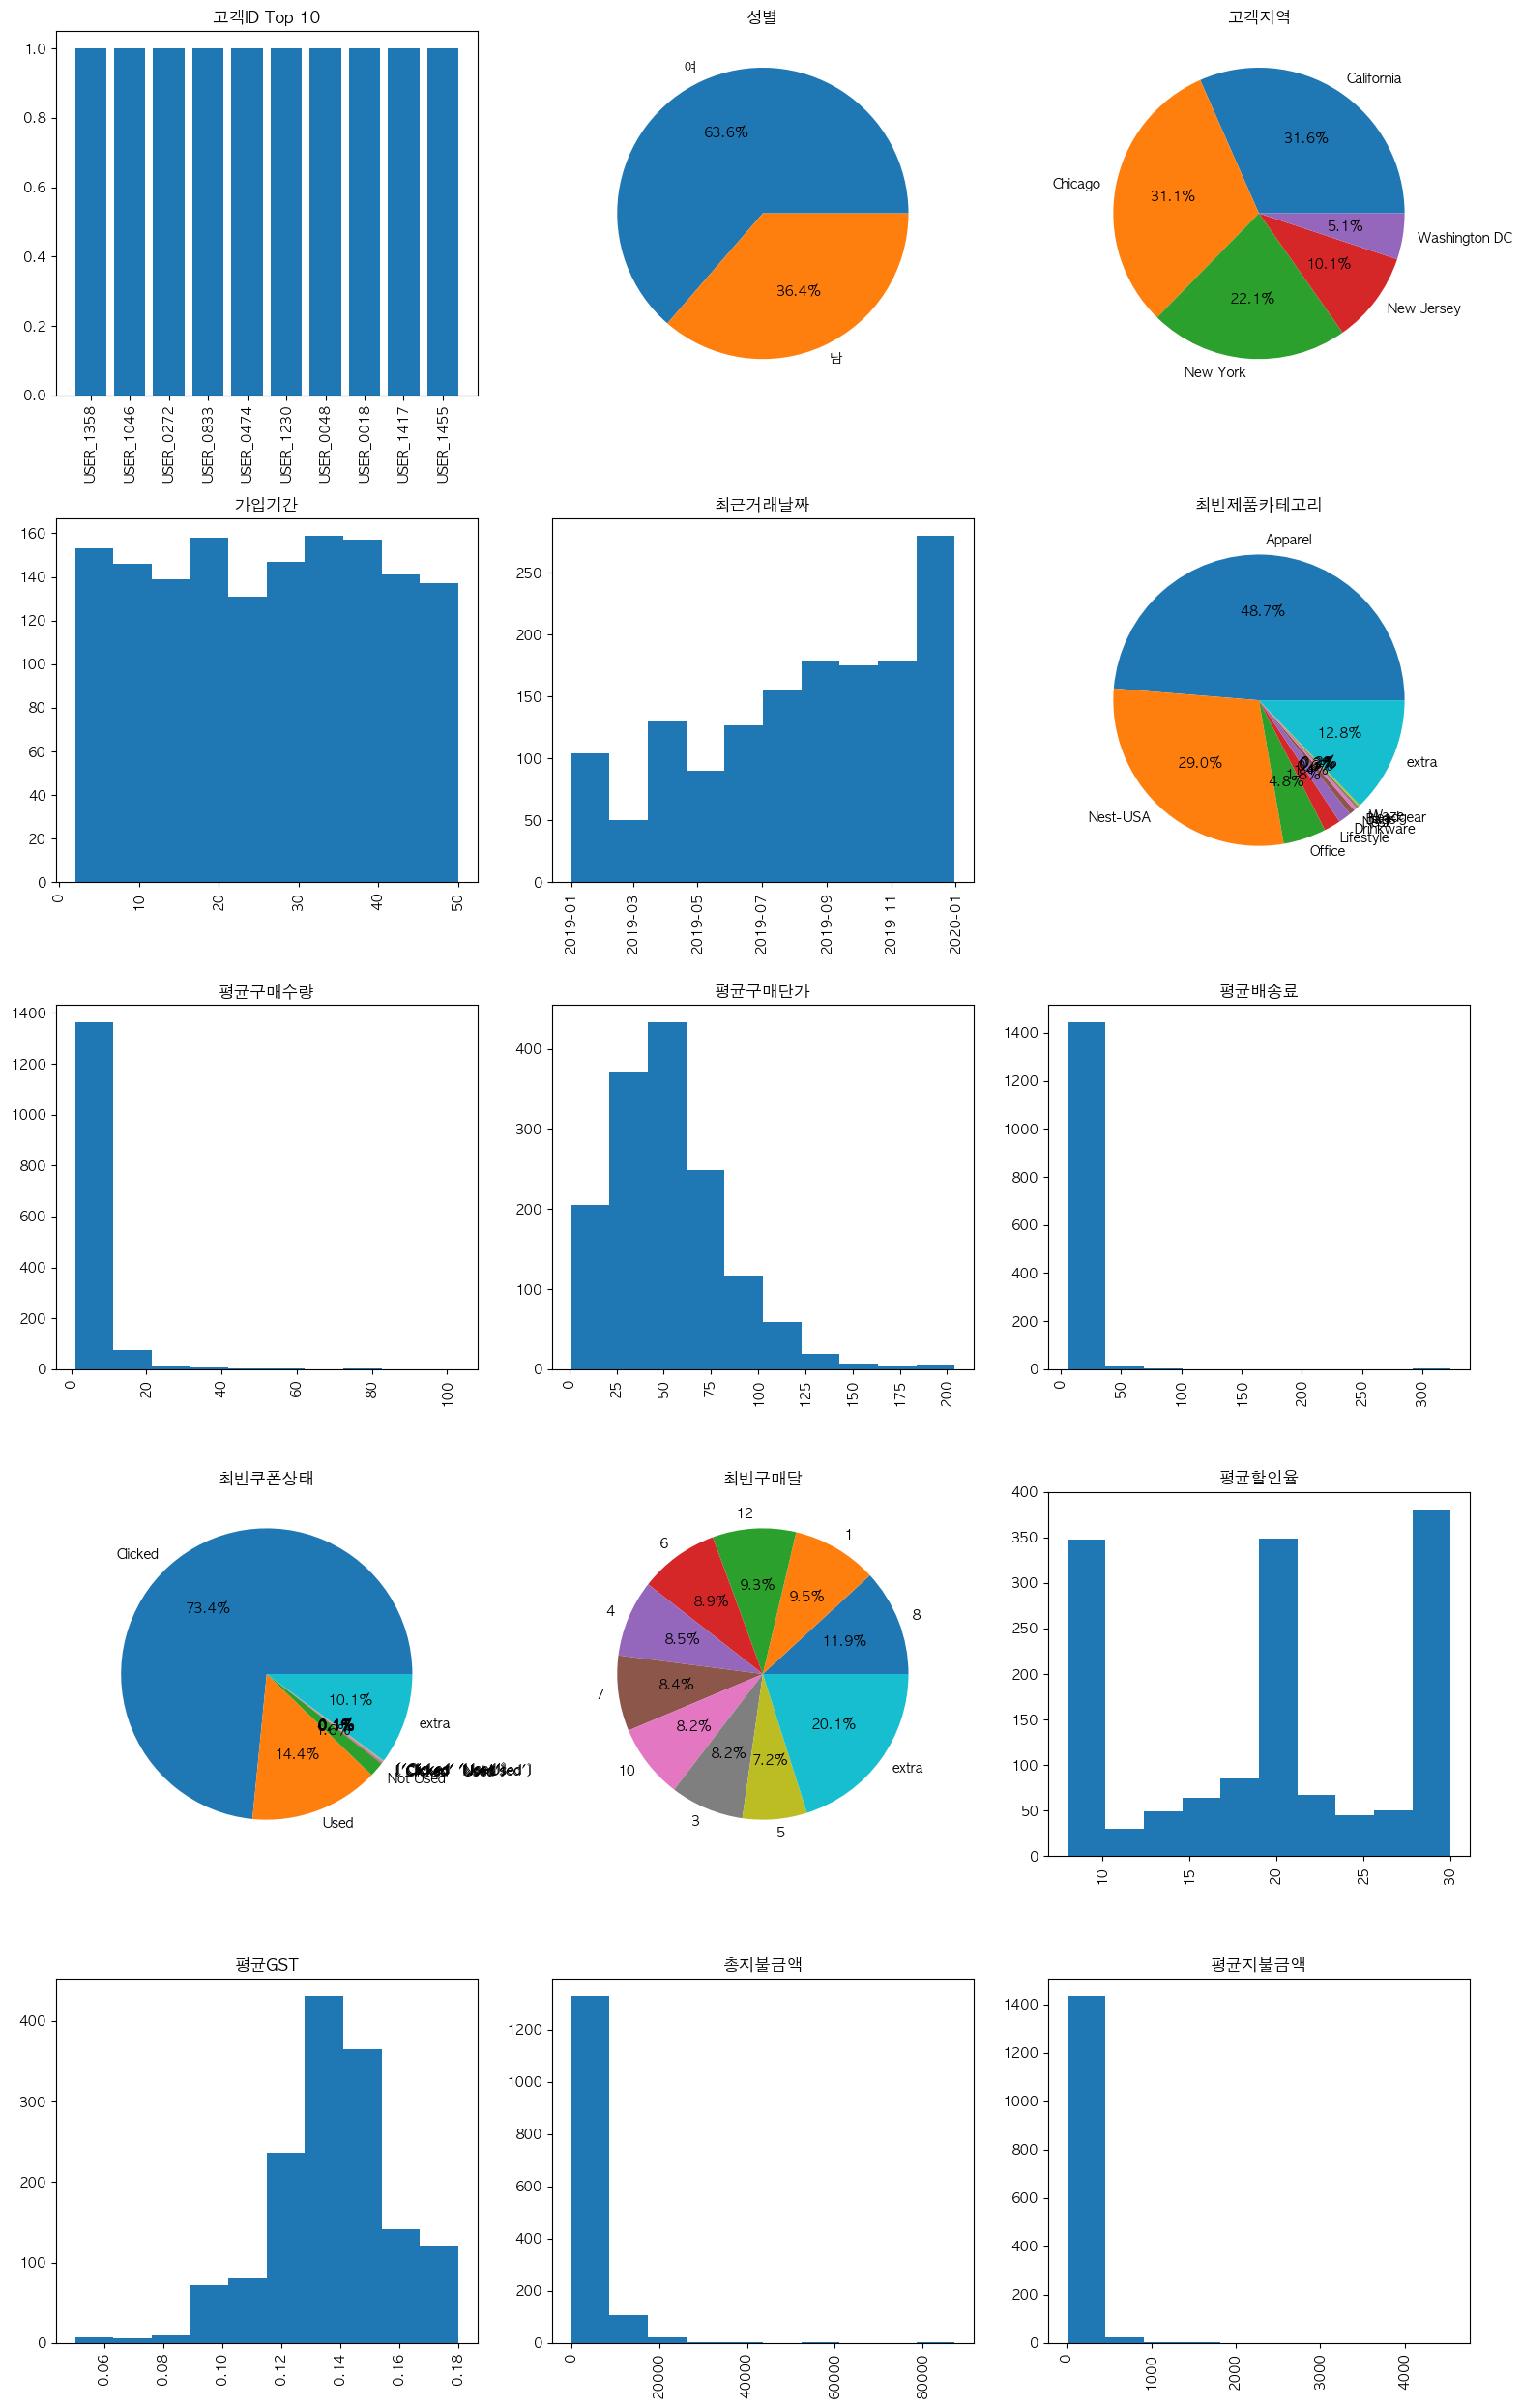

In [425]:
get_3_hist(cust)

- 전체 유저의 63.6%가 여자
- 지역: **CA > Chicago** > NY > NJ > WDC
- 가입기간: 20, **30~40 범위가 좀 더 많음**
- 최근 거래 날짜: 19년도 12월이 제일 많고, 1월과 4월이 마지막 주문인 고객이 튀는 구간
- 고객별 제일 많이 구매한 카테고리:
    - Apparel > Nest-USA > Office > **Lifestyle**
- 평균배송료가 300인 고객이 있음
- 주로 쿠폰을 Used한 유저가 **14.4%**
- 총지불금액/평균지불금액에서 유난히 큰값을 가지는 유저가 있음

+) 가입 기간 (월)과 쿠폰 사용 여부로 Aha moment를 정할 수 있지 않을까?

In [426]:
sales['총주문금액'].describe()

count    52924.000000
mean       101.983198
std        172.365729
min          4.603500
25%         20.160000
50%         45.636200
75%        137.400000
max       8979.275000
Name: 총주문금액, dtype: float64

In [377]:
sales['쿠폰코드'] = sales['쿠폰코드'].fillna('Unknown')

In [378]:
sales['할인율'] = sales['할인율'].fillna(0)

In [401]:
sales.loc[sales['쿠폰코드']=='Unknown', '쿠폰상태'] = 'No Coupon'

In [402]:
sales['쿠폰상태'].value_counts()

쿠폰상태
Clicked      26720
Used         17778
Not Used      8026
No Coupon      400
Name: count, dtype: int64

In [429]:
sales[sales['거래ID']=='Transaction_03166']

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort
37477,USER_0178,여,Chicago,45,Transaction_16623,2019-09-11,Product_0863,Backpacks,1,99.99,...,Transaction_03166,9,Unknown,0.0,0.1,2019-09-11,3000,1683.99,115.989,최근 4년


In [430]:
sales[sales['거래ID']=='Transaction_24059']

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort
9690,USER_1349,남,Chicago,20,Transaction_4859,2019-03-18,Product_0863,Backpacks,1,99.99,...,Transaction_24059,3,Unknown,0.0,0.1,2019-03-18,2000,659.57,154.049,최근 2년


### (유저별) 총지불금액 vs (유저별) 평균지불금액 vs (주문별) 거래금액 vs (주문-상품별) 총주문금액

In [433]:
pd.concat([cust[['총지불금액', '평균지불금액']].describe(),
           sales.groupby('거래ID').agg({'총주문금액':'sum'}).describe().rename(columns={'총주문금액':'거래금액'}),
           sales['총주문금액'].describe()
           ]
           , axis=1)\
           .style.background_gradient(vmax=400, vmin=0).format(precision=2)

,총지불금액,평균지불금액,거래금액,총주문금액
count,1468.00,1468.00,26631.00,52924.00
mean,3676.67,195.44,202.67,101.98
std,5846.08,172.72,388.80,172.37
min,6.99,6.99,4.86,4.60
25%,783.97,132.65,61.77,20.16
50%,2011.62,178.53,136.90,45.64
75%,4495.06,222.28,242.81,137.40
max,87200.90,4540.99,18373.89,8979.27


<Axes: ylabel='총주문금액'>

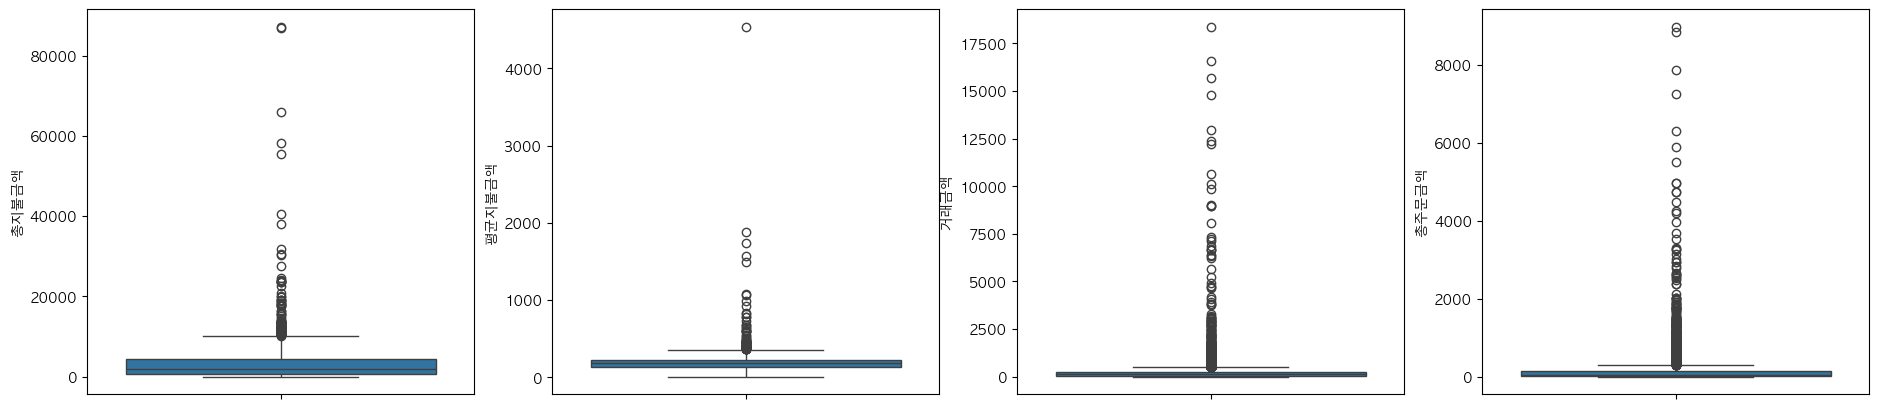

In [434]:
plt.figure(figsize=(23,5))

plt.subplot(1,4,1)
sns.boxplot(cust, y='총지불금액')

plt.subplot(1,4,2)
sns.boxplot(cust, y='평균지불금액')

plt.subplot(1,4,3)
sns.boxplot(sales.groupby('거래ID').agg({'총주문금액':'sum'}).rename(columns={'총주문금액':'거래금액'}), y='거래금액')

plt.subplot(1,4,4)
sns.boxplot(sales, y='총주문금액')

In [180]:
## Aha moment 고민을 위한, 재거래율 구하기
# 1. 고객별 주문 수
sales.groupby('고객ID')['거래ID'].nunique().describe().round(2)

count    1468.00
mean       18.14
std        24.98
min         1.00
25%         5.00
50%        11.00
75%        23.00
max       328.00
Name: 거래ID, dtype: float64

In [183]:
sales.groupby('고객ID')['거래ID'].nunique().sort_values(ascending=False)

고객ID
USER_0118    328
USER_0736    291
USER_0563    289
USER_0643    276
USER_1355    263
            ... 
USER_1085      1
USER_0798      1
USER_0114      1
USER_0796      1
USER_0000      1
Name: 거래ID, Length: 1468, dtype: int64

In [186]:
# 주문 들어간 건수만 695개, 고유 거래ID는 328개...
sales[sales['고객ID']=='USER_0118']

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,쿠폰상태,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액
1015,USER_0118,여,Chicago,28,Transaction_0536,2019-01-08,Product_0201,Apparel,3,14.02,...,Used,Transaction_02123,1,SALE10,10.0,0.18,2019-01-08,5000,2551.38,69.55372
2541,USER_0118,여,Chicago,28,Transaction_1339,2019-01-20,Product_0981,Nest-USA,1,153.71,...,Used,Transaction_02173,1,ELEC10,10.0,0.10,2019-01-20,3000,2073.51,20.33390
6158,USER_0118,여,Chicago,28,Transaction_3192,2019-02-18,Product_0976,Nest-USA,2,119.00,...,Clicked,Transaction_02178,2,ELEC20,20.0,0.10,2019-02-18,3000,1586.43,25.54000
6159,USER_0118,여,Chicago,28,Transaction_3193,2019-02-18,Product_0976,Nest-USA,2,119.00,...,Used,Transaction_02179,2,ELEC20,20.0,0.10,2019-02-18,3000,1586.43,25.54000
6160,USER_0118,여,Chicago,28,Transaction_3194,2019-02-18,Product_0976,Nest-USA,1,119.00,...,Clicked,Transaction_02180,2,ELEC20,20.0,0.10,2019-02-18,3000,1586.43,16.02000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36597,USER_0118,여,Chicago,28,Transaction_16284,2019-09-05,Product_0984,Nest-USA,1,79.00,...,Used,Transaction_02176,9,ELEC30,30.0,0.10,2019-09-05,2500,1201.09,11.53000
38121,USER_0118,여,Chicago,28,Transaction_16900,2019-09-15,Product_0117,Apparel,1,39.19,...,Used,Transaction_02177,9,SALE30,30.0,0.18,2019-09-15,3000,2546.67,79.93794
38122,USER_0118,여,Chicago,28,Transaction_16900,2019-09-15,Product_0286,Apparel,1,16.99,...,Used,Transaction_02177,9,SALE30,30.0,0.18,2019-09-15,3000,2546.67,77.14074
38123,USER_0118,여,Chicago,28,Transaction_16900,2019-09-15,Product_0942,Office,1,2.50,...,Clicked,Transaction_02177,9,OFF30,30.0,0.10,2019-09-15,3000,2546.67,75.17500


<Axes: ylabel='거래ID'>

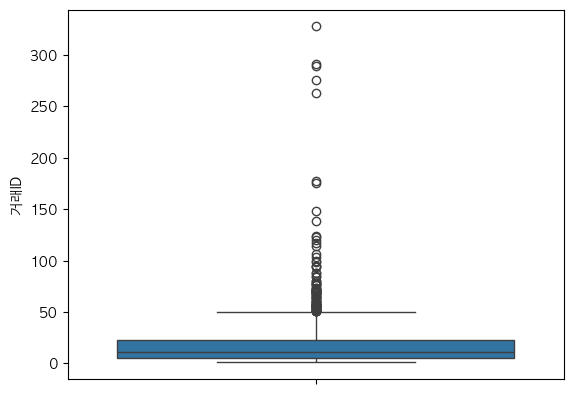

In [179]:
sns.boxplot(sales.groupby('고객ID')['거래ID'].nunique().to_frame(), y='거래ID')

In [197]:
# 가입기간별로 12개월씩 그룹을 나눠서 재주문율: 구매주기?

sales['가입기간_cohort'] = pd.cut(sales['가입기간'], bins=[0, 12, 24, 36, 48, 60], labels=['최근 1년', '최근 2년', '최근 3년', '최근 4년', '최근 5년'])

In [245]:
# 평균 구매주기 구하기 (days)
tmp = sales.groupby(['고객ID', '거래ID'])['거래날짜'].min().reset_index()

In [246]:
tmp = tmp.sort_values('거래날짜')

In [255]:
tmp = pd.concat([tmp,tmp.groupby('고객ID')['거래날짜'].diff().rename('최근N일전거래')], axis=1)

In [258]:
tmp = tmp.assign(최근N일전거래=tmp['최근N일전거래'].dt.days)

In [260]:
tmp.groupby('고객ID').agg({'최근N일전거래':'mean'})

,최근N일전거래
고객ID,
USER_0000,NaN
USER_0001,7.433333
USER_0002,17.000000
USER_0003,0.000000
USER_0004,0.000000
...,...
USER_1463,0.000000
USER_1464,5.833333
USER_1465,76.000000


In [200]:
cust['가입기간_cohort'] = pd.cut(cust['가입기간'], bins=[0, 12, 24, 36, 48, 60], labels=['최근 1년', '최근 2년', '최근 3년', '최근 4년', '최근 5년'])

In [262]:
cust = cust.merge(tmp.groupby('고객ID').agg({'최근N일전거래':'mean'}), on='고객ID')

In [265]:
cust.groupby('가입기간_cohort').agg({'최근N일전거래':['count','min', 'mean', 'max']})

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_43049/1403674610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust.groupby('가입기간_cohort').agg({'최근N일전거래':['count','min', 'mean', 'max']})


최근N일전거래                           
              count  min      mean         max
가입기간_cohort                                   
최근 1년           298  0.0  5.266449  129.000000
최근 2년           337  0.0  7.037138  172.000000
최근 3년           326  0.0  6.137914  116.000000
최근 4년           330  0.0  4.769128  162.500000
최근 5년            52  0.0  6.243027   65.333333

49, 50개월 전에 가입한 유저가 최근 거래일과의 차이가 크지 않았다. (최대 65일 전)

#### 최근 가입한 고객 중 재구매율이 높은 유저 분포를 확인하면 aha-moment를 알 수 있지 않을까?


In [278]:
cust = cust.merge(sales.groupby('고객ID').agg({'거래ID':'count'}).reset_index().rename(columns={'거래ID':'주문수'}), on='고객ID', how='left')

In [279]:
cust = cust.merge(sales.groupby('고객ID').agg({'거래ID':'nunique'}).reset_index().rename(columns={'거래ID':'거래수'}), on='고객ID', how='left')

In [272]:
# 거래ID count -> 주문 수 (2)
# 거래ID unique -> 거래 수 (1)
sales[sales['고객ID']=='USER_0000']

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort
38120,USER_0000,여,New York,31,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,...,Transaction_00000,9,SALE30,30.0,0.18,2019-09-15,3000,2546.67,77.51874,최근 3년
38125,USER_0000,여,New York,31,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,...,Transaction_00000,9,OFF30,30.0,0.10,2019-09-15,3000,2546.67,75.77000,최근 3년


<Axes: xlabel='가입기간', ylabel='거래수'>

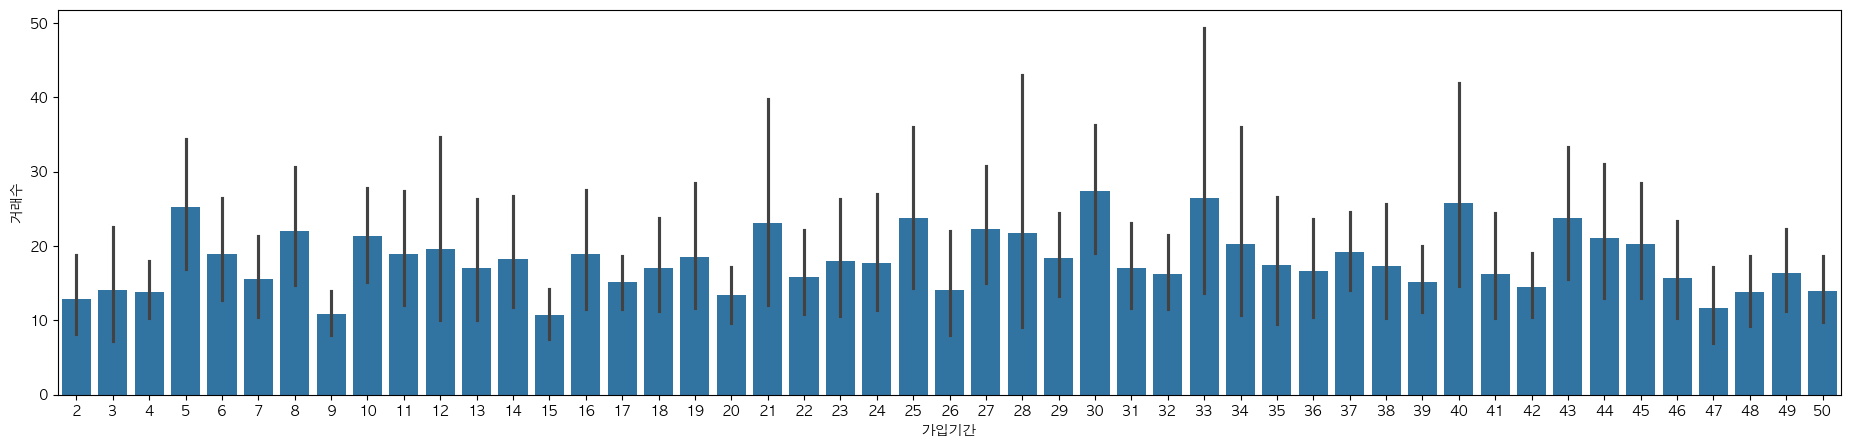

In [285]:
# x축:가입기간, y축:거래 횟수 (고유 거래ID)
plt.figure(figsize=(23,5))
sns.barplot(cust, x='가입기간', y='거래수')

<Axes: xlabel='가입기간', ylabel='주문수'>

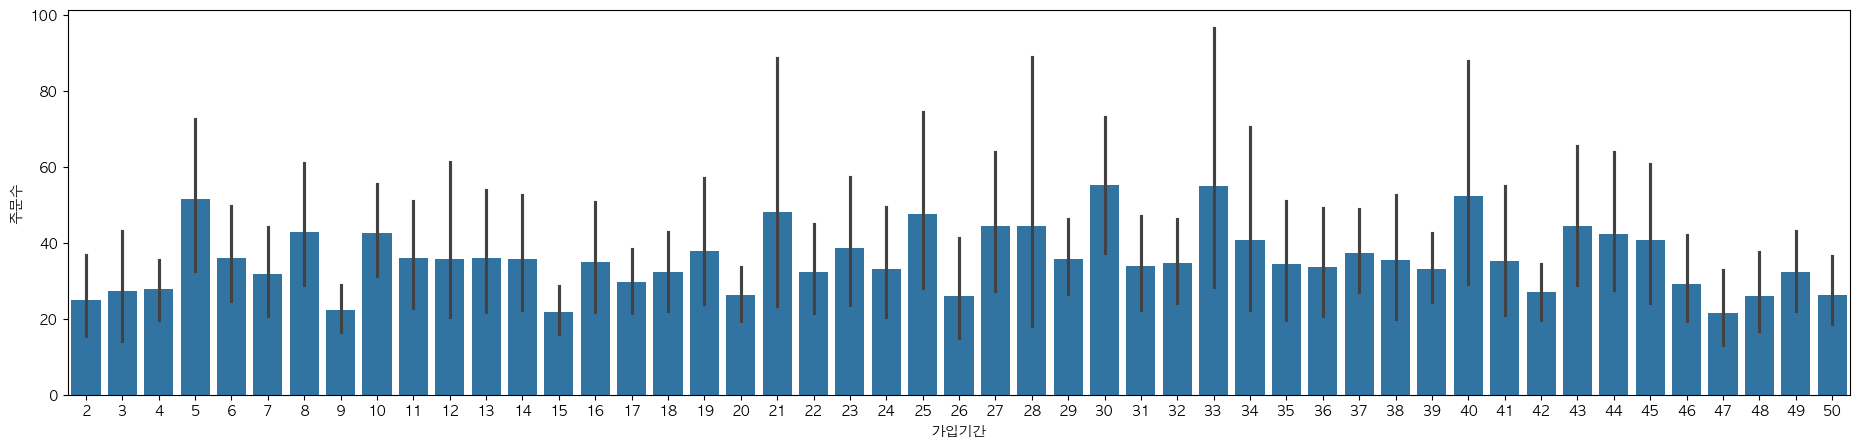

In [284]:
# x축:가입기간, y축:거래 횟수
plt.figure(figsize=(23,5))
sns.barplot(cust, x='가입기간', y='주문수')

In [286]:
cust['가입기간'].value_counts()

가입기간
34    41
40    39
25    39
4     38
37    37
19    36
6     36
32    36
45    36
24    36
20    35
10    34
48    34
39    34
22    34
21    33
28    32
7     31
26    31
15    31
29    30
30    30
5     30
33    30
16    29
44    29
9     28
8     28
13    28
12    28
42    28
41    28
50    28
31    28
17    27
18    27
46    26
2     26
49    26
38    26
11    25
35    24
27    24
3     23
14    23
47    23
23    22
36    21
43    20
Name: count, dtype: int64

In [ ]:
# 가입기간이 11 이내인 유저들 대상

<Axes: xlabel='월', ylabel='총주문금액'>

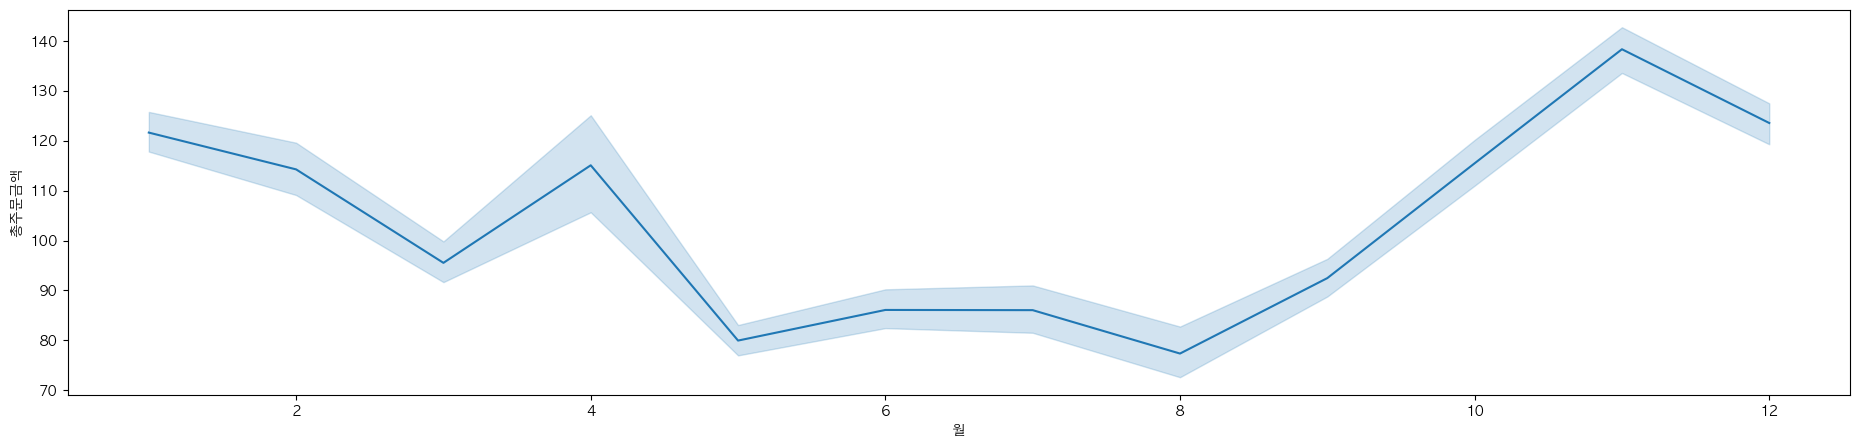

In [454]:
plt.figure(figsize=(23,5))
sns.lineplot(sales, x='월', y='총주문금액')

In [308]:
tmp[tmp['평균금액']==max(tmp['평균금액'])]

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort,총주문금액_
48528,USER_1079,남,Washington DC,11,Transaction_22435,2019-12-01,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-01,3000,2358.10,267.9689,최근 1년,380.0270
48532,USER_1079,남,Washington DC,11,Transaction_22438,2019-12-01,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-01,3000,2358.10,267.9689,최근 1년,380.0270
48546,USER_1293,여,California,28,Transaction_22448,2019-12-01,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-01,3000,2358.10,267.9689,최근 3년,380.0270
48553,USER_1293,여,California,28,Transaction_22454,2019-12-01,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-01,3000,2358.10,267.9689,최근 3년,267.9689
48594,USER_0318,여,California,13,Transaction_22480,2019-12-02,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-02,3000,1907.19,267.9689,최근 2년,380.0270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52828,USER_1164,여,New Jersey,38,Transaction_24998,2019-12-30,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-30,4000,674.31,267.9689,최근 4년,380.0270
52832,USER_1164,여,New Jersey,38,Transaction_25000,2019-12-30,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-30,4000,674.31,267.9689,최근 4년,267.9689
52837,USER_1164,여,New Jersey,38,Transaction_25004,2019-12-30,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-30,4000,674.31,267.9689,최근 4년,267.9689
52873,USER_0563,여,Chicago,33,Transaction_25024,2019-12-31,Product_0994,Nest,1,355.74,...,12,NE30,30.0,0.05,2019-12-31,4000,2058.75,267.9689,최근 3년,267.9689


In [299]:
sales[sales['총주문금액']==max(sales['총주문금액'])]

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort
12163,USER_0118,여,Chicago,28,Transaction_5967,2019-04-05,Product_0925,Headgear,500,18.99,...,Transaction_02339,4,HGEAR10,10.0,0.05,2019-04-05,2500,2342.68,8979.275,최근 3년


In [300]:
sales[sales['수량']==max(sales['수량'])]

,고객ID,성별,고객지역,가입기간,old_거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,거래ID,월,쿠폰코드,할인율,GST,날짜,오프라인비용,온라인비용,총주문금액,가입기간_cohort
42456,USER_0546,여,California,24,Transaction_19068,2019-10-16,Product_0914,Office,900,0.99,...,Transaction_09212,10,OFF10,10.0,0.1,2019-10-16,2500,1218.6,895.08,최근 2년


##### 카테고리별 쿠폰 사용/비사용 비율

In [452]:
sales.groupby('쿠폰상태').agg({'수량':['min','mean', 'max'], '평균금액':['min', 'mean', 'max']})

수량                 평균금액                   
          min      mean  max   min       mean     max
쿠폰상태                                                 
Clicked     1  4.452732  600  0.40  52.578187  355.74
No Coupon   1  4.165000  100  3.60  27.099325  103.15
Not Used    1  4.376900  500  0.39  52.832524  355.74
Used        1  4.627123  900  0.40  52.022864  355.74

<Axes: ylabel='count'>

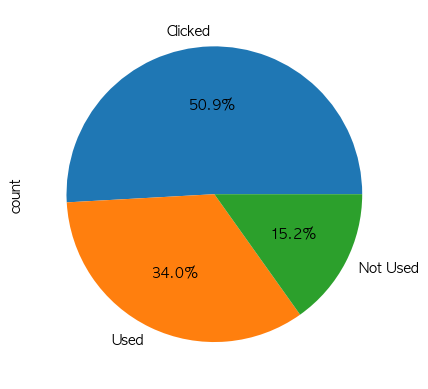

In [443]:
sales[sales['제품카테고리']=='Apparel']['쿠폰상태'].value_counts().plot.pie(autopct='%.1f%%')

<Axes: ylabel='count'>

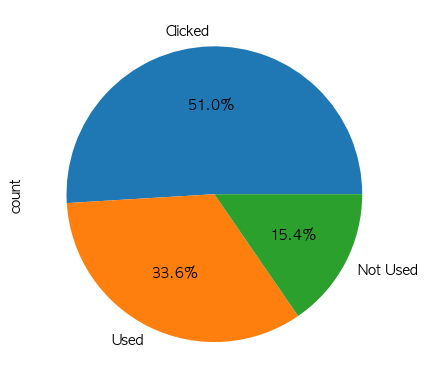

In [444]:
sales[sales['제품카테고리']=='Nest-USA']['쿠폰상태'].value_counts().plot.pie(autopct='%.1f%%')

<Axes: ylabel='count'>

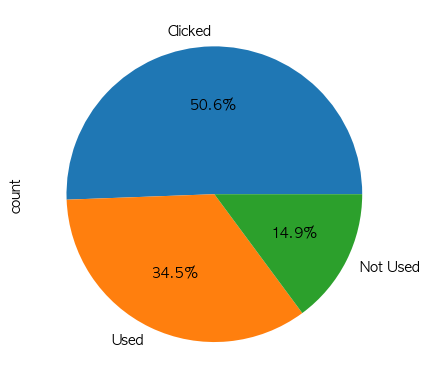

In [445]:
sales[sales['제품카테고리']=='Office']['쿠폰상태'].value_counts().plot.pie(autopct='%.1f%%')

<Axes: ylabel='count'>

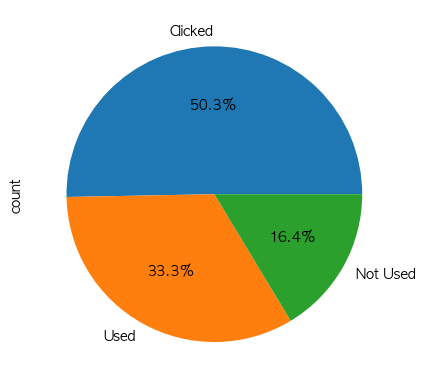

In [446]:
sales[sales['제품카테고리']=='Drinkware']['쿠폰상태'].value_counts().plot.pie(autopct='%.1f%%')